<a href="https://colab.research.google.com/github/belyakovmy/pet-projects/blob/main/RFM_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Об RFM-анализе
RFM-анализ — метод анализа, позволяющий делить клиентов на группы в зависимости от суммы покупок и их регулярности. Нужен для того, чтобы продумать схемы работы с каждой группой клиентов.

Аббревиатура RFM расшифровывается:
* Recency — давность (как давно пользователи что-то покупали).
* Frequency — частота (как часто они покупают).
* Monetary — деньги (общая сумма покупок).  

По каждому из этих признаков мы выделяем по три группы (однако групп может быть и больше). Затем присваиваем каждой группе числовое обозначение от 1 до 3:

|Давность последней покупки (Recency)|Частота покупок (Frequency)|Сумма покупки (Monetary)|
|-|-|-|
|1 - недавние клиенты|1 - частые|1 - большая|
|2 - редкие нерегулярные|2 - редкие|2 - средняя|
|3 - давние, возможно потерянные|3 - очень редкие|3 - маленькая|

В результате можем получить максимум 27 групп. С ними можно работать индивидуально или объединять в близкие сегменты.

Такой анализ дает понимание, как взаимодействовать с клиентами каждого сегмента, выстраивая персонализированную коммуникацию, и подталкивать их к повторным покупкам.

Основной принцип:   
*лучших клиентов удерживаем, середнячков подтягиваем до лучших, а уходящих и почти потерянных — возвращаем.*

##Структура данных
Это синтетический набор данных, который содержит записи транзакций вымышленного онлайн-сервиса.

Данные включают:
* *CustomerID:* уникальный идентификатор для каждого клиента.
* *TransactionID:* уникальный идентификатор для каждой транзакции.
* *TransactionDate:* дата транзакции.
* *TransactionValue:* общая стоимость транзакции (в индонезийских рупиях).  
* *ProductCategory:* категория приобретенного продукта (например, электроника, мода).
* *Region:* город или регион клиента.
* *PaymentMethod:* используемый способ оплаты (например, банковский перевод, электронный кошелек).
* *CustomerAgeGroup:* возрастная группа клиента (например, 18–25 лет).
* *CustomerGender:* пол клиента (мужской, женский).

##Цель исследования
Провести анализ клиентов с помощью RFM-анализа: классифицировать покупателей по истории их покупок и сформировать предложения по коммуникации с каждой группой.  
Дополнительно:
* провел исследование лучших клиентов (группа 111) в разрезе таких параметров, как пол, возраст, регион, категория покупок и способы оплаты.
* сделал RFM-анализ на SQL

##RFM-анализ

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = 'https://media.githubusercontent.com/media/belyakovmy/pet-projects/refs/heads/main/datasets/UrbanMartTransactions.csv'
data = pd.read_csv(url)
df = data.copy()

In [ ]:
df.head()

,TransactionID,CustomerID,TransactionDate,TransactionValue,ProductCategory,PaymentMethod,CustomerGender,CustomerAgeGroup,Region
0,TRANS000000,CUST01574,2023-04-09,467907,Sport,Bank Transfer,Female,>50,Surabaya
1,TRANS000001,CUST01836,2024-08-05,2713789,Beauty,Credit Card,Female,26-35,Surabaya
2,TRANS000002,CUST01291,2024-04-07,4539248,Fashion,Bank Transfer,Male,18-25,Bandung
3,TRANS000003,CUST00245,2024-06-12,3058426,Home,Bank Transfer,Male,36-50,Jakarta
4,TRANS000004,CUST00163,2023-12-18,3304874,Fashion,Bank Transfer,Female,26-35,Jakarta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TransactionID     50000 non-null  object
 1   CustomerID        50000 non-null  object
 2   TransactionDate   50000 non-null  object
 3   TransactionValue  50000 non-null  int64 
 4   ProductCategory   50000 non-null  object
 5   PaymentMethod     50000 non-null  object
 6   CustomerGender    50000 non-null  object
 7   CustomerAgeGroup  50000 non-null  object
 8   Region            50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


Нет пропусков и дубликатов:

In [ ]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
TransactionDate,0
TransactionValue,0
ProductCategory,0
PaymentMethod,0
CustomerGender,0
CustomerAgeGroup,0
Region,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], yearfirst=True)

Есть данные за два года:

In [ ]:
df['TransactionDate'].agg(['min', 'max'])

,TransactionDate
min,2023-01-01
max,2024-12-30


In [ ]:
df['TransactionDate'].dt.strftime('%Y-%m').value_counts().sort_index()

,count
TransactionDate,
2023-01,2148
2023-02,1988
2023-03,2033
2023-04,2063
2023-05,2114
2023-06,2062
2023-07,2125
2023-08,2123
2023-09,2059


Для анализа будем рассматривать записи за 2024 год:

In [ ]:
df = df.query('TransactionDate.dt.year == 2024')

In [ ]:
df.head()

,TransactionID,CustomerID,TransactionDate,TransactionValue,ProductCategory,PaymentMethod,CustomerGender,CustomerAgeGroup,Region
1,TRANS000001,CUST01836,2024-08-05,2713789,Beauty,Credit Card,Female,26-35,Surabaya
2,TRANS000002,CUST01291,2024-04-07,4539248,Fashion,Bank Transfer,Male,18-25,Bandung
3,TRANS000003,CUST00245,2024-06-12,3058426,Home,Bank Transfer,Male,36-50,Jakarta
5,TRANS000005,CUST00331,2024-11-24,1556151,Electronics,Credit Card,Male,18-25,Bandung
8,TRANS000008,CUST00112,2024-09-03,1184496,Sport,Bank Transfer,Male,18-25,Surabaya


Нужно определить день, относительно которого будем учитывать давность последней покупки клиентов. Возьмем последний день из набора данных + один день:    

In [ ]:
max_dt =  df['TransactionDate'].max() + pd.to_timedelta('1 day')
max_dt

Timestamp('2024-12-31 00:00:00')

Посчитали показатели для каждого клиента:  
* recency: разница между выбранной датой и датой последней активности пользователя.  
* frequency: количество транзакций за исследуемый период.
* monetary: сумма, которую потратил клиент.

In [ ]:
rfm_table = df.groupby('CustomerID').agg(
    recency = ('TransactionDate', lambda x: (max_dt - x.max()).days),
    frequency = ('TransactionID', 'nunique'),
    monetary = ('TransactionValue', 'sum')
)

In [ ]:
rfm_table

,recency,frequency,monetary
CustomerID,,,
CUST00001,1,15,45115377
CUST00002,18,10,27267181
CUST00003,22,16,36209928
CUST00004,10,17,48651995
CUST00005,21,20,57408643
...,...,...,...
CUST01996,21,18,41093665
CUST01997,74,8,16008540
CUST01998,79,16,34822271


###Определение границ рангов
Это нетривиальный этап, потому что разделить измерения RFM на ранги можно различными способами. Например:
* *Сегментировать равномерно по диапазонным значениям:* берем максимальное значение в каждом из параметров и делим на количество сегментов.  
* *Сегментировать по количеству клиентов:* разделить, так чтобы в каждый ранг попало примерно одинаковое количество пользователей. Между группами не будет сильного дисбаланса в количестве людей, но сами границы могут быть более размыты.
* *Сегментировать по ручным границам:* границы задаются самостоятельно на основе бизнес-логики. Это дает больше прозрачности и контроля, но требует знания специфики бизнеса.


Рассмотрим RFM параметры отдельно и поэкспериментируем с границами:

*recency:*


In [ ]:
rfm_table['recency'].describe(percentiles=np.arange(0.2, 1, 0.2))

,recency
count,2000.000000
mean,29.610000
std,28.727975
min,1.000000
20%,7.000000
40%,15.000000
50%,20.000000
60%,27.000000
80%,48.000000
max,215.000000


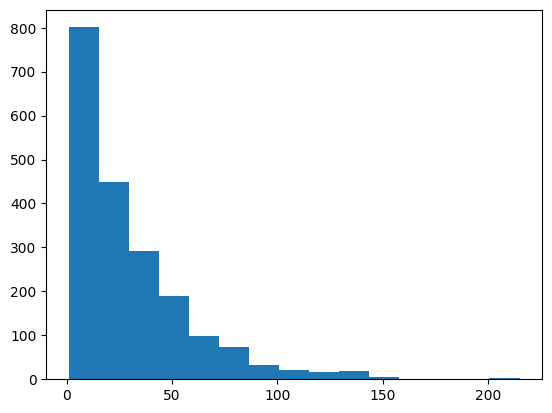

In [ ]:
plt.hist(rfm_table['recency'], bins=15);

In [ ]:
#1
pd.cut(rfm_table['recency'], 3).value_counts()

,count
recency,
"(0.786, 72.333]",1830
"(72.333, 143.667]",161
"(143.667, 215.0]",9


In [ ]:
#2
pd.qcut(rfm_table['recency'], 3).value_counts()

,count
recency,
"(0.999, 12.0]",678
"(12.0, 33.0]",673
"(33.0, 215.0]",649


При определении границ с помощью квантилей (второй вариант) получили, что примерно треть клиентов совершила последнюю покупку 12 или менее дней назад. Считать таких клиентов «недавними», а тех, кто совершил последнюю покупку от 13 до 33 дней назад «относительно недавними» — кажется, подходящим вариантом.

In [ ]:
rfm_table['r_score'] = pd.qcut(rfm_table['recency'], 3, labels=[1, 2, 3]).astype('str')

In [ ]:
rfm_table.head()

,recency,frequency,monetary,r_score
CustomerID,,,,
CUST00001,1,15,45115377,1
CUST00002,18,10,27267181,2
CUST00003,22,16,36209928,2
CUST00004,10,17,48651995,1
CUST00005,21,20,57408643,2


*frequency:*

In [ ]:
rfm_table['frequency'].describe()

,frequency
count,2000.000000
mean,12.490000
std,3.643287
min,3.000000
25%,10.000000
50%,12.000000
75%,15.000000
max,27.000000


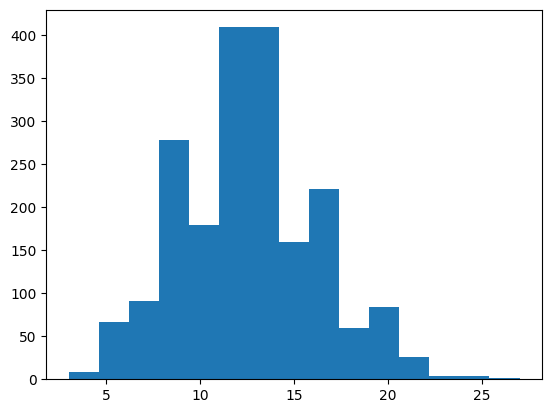

In [ ]:
plt.hist(rfm_table['frequency'], bins=15);

In [ ]:
#1
pd.cut(rfm_table['frequency'], 3).value_counts(sort=False)

,count
frequency,
"(2.976, 11.0]",808
"(11.0, 19.0]",1123
"(19.0, 27.0]",69


In [ ]:
#2
pd.qcut(rfm_table['frequency'], 3).value_counts()

,count
frequency,
"(2.999, 11.0]",808
"(11.0, 14.0]",632
"(14.0, 27.0]",560


In [ ]:
#3
pd.cut(rfm_table['frequency'], bins=[0.5, 10, 15, np.inf]).value_counts(sort=False)

,count
frequency,
"(0.5, 10.0]",622
"(10.0, 15.0]",978
"(15.0, inf]",400


Здесь вариант с квантилями (второй) кажется не очень удачным, потому что границы средней группы: от 12 до 14 включительно - очень размыты.  
В первом варианте, с равномерными границами, последняя группа получилась очень маленькая (69 человек) - хотелось бы более равновесные группы, поэтому попробуем использовать ручные границы (вариант три) - здесь преобладает средняя группа, но нет такого колоссального перекоса, как в первом варианте.

In [ ]:
 rfm_table['f_score'] = pd.cut(rfm_table['frequency'], bins=[0.5, 10, 15, np.inf], labels=[3, 2, 1]).astype('str')

In [ ]:
rfm_table.head()

,recency,frequency,monetary,r_score,f_score
CustomerID,,,,,
CUST00001,1,15,45115377,1,2
CUST00002,18,10,27267181,2,3
CUST00003,22,16,36209928,2,1
CUST00004,10,17,48651995,1,1
CUST00005,21,20,57408643,2,1


*monetary:*

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
rfm_table['monetary'].describe()

,monetary
count,2000.00
mean,31542857.19
std,10556650.39
min,4916186.00
25%,24103613.00
50%,30814525.00
75%,38516725.25
max,70473267.00


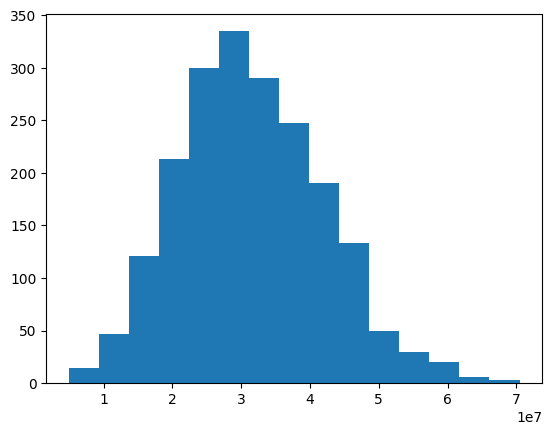

In [ ]:
plt.hist(rfm_table['monetary'], bins=15);

In [ ]:
pd.qcut(rfm_table['monetary'], 3).value_counts(sort=False)

,count
monetary,
"(4916185.999, 26370875.0]",667
"(26370875.0, 35770862.0]",666
"(35770862.0, 70473267.0]",667


С учетом распределения значений вариант сегментации с помощью квантилей выглядит подходящим.

In [ ]:
rfm_table['m_score'] = pd.qcut(rfm_table['monetary'], 3, labels=[3, 2, 1]).astype('str')

In [ ]:
rfm_table.head()

,recency,frequency,monetary,r_score,f_score,m_score
CustomerID,,,,,,
CUST00001,1,15,45115377,1,2,1
CUST00002,18,10,27267181,2,3,2
CUST00003,22,16,36209928,2,1,1
CUST00004,10,17,48651995,1,1,1
CUST00005,21,20,57408643,2,1,1


##Итоговая таблица с разделением по группам:

In [ ]:
rfm_table['rfm'] = rfm_table['r_score'] + rfm_table['f_score'] + rfm_table['m_score']

In [ ]:
rfm_table

,recency,frequency,monetary,r_score,f_score,m_score,rfm
CustomerID,,,,,,,
CUST00001,1,15,45115377,1,2,1,121
CUST00002,18,10,27267181,2,3,2,232
CUST00003,22,16,36209928,2,1,1,211
CUST00004,10,17,48651995,1,1,1,111
CUST00005,21,20,57408643,2,1,1,211
...,...,...,...,...,...,...,...
CUST01996,21,18,41093665,2,1,1,211
CUST01997,74,8,16008540,3,3,3,333
CUST01998,79,16,34822271,3,1,2,312


In [ ]:
print(f"Количество групп клиентов после сегментации: {rfm_table['rfm'].nunique()}")

Количество групп клиентов после сегментации: 24


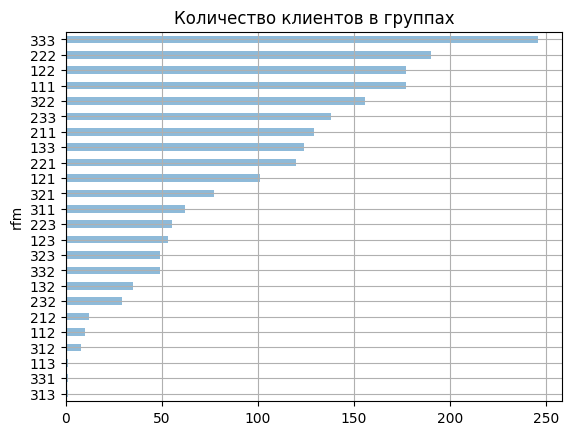

In [ ]:
rfm_table['rfm'].value_counts(ascending=True).plot(kind='barh',
                                                   grid=True,
                                                   alpha=0.5,
                                                   title='Количество клиентов в группах');

Распределим сегменты клиентов на более общие группы по сходной стратегии работы с ними:

```
Постоянные клиенты
111, 112, 113, 121, 122, 123
```
```
Новички
131, 132, 133
```

```
Неактивные клиенты
211, 212, 213, 221, 222, 223, 231, 232, 233

```
```
Уходящие клиенты
311, 312, 313, 321, 322, 323, 331, 332, 333

```

In [ ]:
def segment(rfm):
    r, f, m = rfm

    if r == '1' and f in ['1','2'] and m in ['1','2','3']:
        return 'Постоянные клиенты'
    elif r == '1'and f == '3' and m in ['1','2','3']:
        return 'Новички'
    elif r == '2' and f in ['1','2','3'] and m in ['1','2', '3']:
        return 'Неактивные клиенты'
    else:
        return 'Уходящие клиенты'

In [ ]:
rfm_table['segment'] = rfm_table['rfm'].apply(segment)

In [ ]:
rfm_table.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm,segment
CustomerID,,,,,,,,
CUST00001,1,15,45115377,1,2,1,121,Постоянные клиенты
CUST00002,18,10,27267181,2,3,2,232,Неактивные клиенты
CUST00003,22,16,36209928,2,1,1,211,Неактивные клиенты
CUST00004,10,17,48651995,1,1,1,111,Постоянные клиенты
CUST00005,21,20,57408643,2,1,1,211,Неактивные клиенты


In [ ]:
grouped_table = rfm_table['segment'].value_counts().reset_index()
grouped_table

,segment,count
0,Неактивные клиенты,673
1,Уходящие клиенты,649
2,Постоянные клиенты,519
3,Новички,159


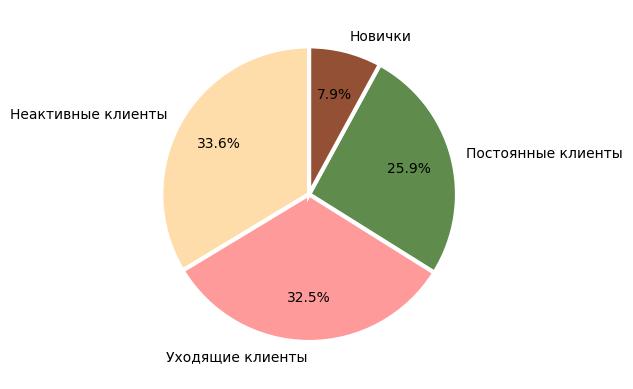

In [ ]:
colors = ['#FFDDAB', '#FF9A9A', '#5F8B4C', '#945034']
plt.pie(grouped_table['count'],
        labels=grouped_table['segment'],
        startangle=90,
        colors = colors,
        autopct='%.1f%%',
        pctdistance=0.7,
        wedgeprops={'edgecolor':'w',
                    'lw':3},
        )

plt.show()

##Точечные рекомендации:
Постоянные клиенты:
```
111: купили недавно, покупают часто на большие суммы.
Идеальные клиенты. Лучше стимулировать нематериальными бонусами: присылать полезные экспертные материалы, предложить им доступ к новым товарам, которых ещё нет в продаже.
```
```
113, 122, 123: купили недавно, покупают часто или средне на средние или маленькие суммы.
Пробуем увеличить средний чек, предлагаем более дорогие товары из ассортимента.
```
Новички:
```
131: новички с большой суммой покупки.
У этих клиентов хороший потенциал вырасти до лучших. Можно предложить специальную акцию или скидку на следующую покупку.
```

```
132, 133: новички со средней или маленькой суммой покупки.
Пытаемся их заинтересовать, чтобы увеличить шанс повторных покупок (приглашаем подписаться на соцсети или рассылку)
```
Неактивные клиенты:
```
211: неактивные постоянные с большой суммой покупки.
Эти клиенты покупали много и часто, но некоторое  время назад пропали. Было бы хорошо выяснить, что случилось-почему перестали заказывать
```

```
212, 213: неактивные, постоянные со средней или маленькой суммой покупки.
Можем отправить пуш или письмо, предложить акцию или скидку, чтобы вернуть покупателя.
```

```
221, 222, 223, 231, 232, 233: кандидаты в Уходящие клиенты.
Стараемся активировать их разными способами.
```
Уходящие клиенты:
```
311, 312, 313: клиенты давно не совершали заказов, но раньше делали это часто на разные суммы.
Было бы хорошо выйти с ними на контакт, узнать почему стали реже покупать. Предложить акции или скидки.
```

```
321, 322, 323: клиенты давно не совшали заказы, но раньше сделали несколько покупок на разные суммы.
Тоже можно было бы узнать, почему перестали заказывать и попробовать
```

```
331, 332, 333: покупали редко и давно.
Можем предложить бонусные баллы или промокод - попытки активировать их.
```











##Дополнительно

###Исследование топовых клиентов
В исходной таблице были поля с дополнительными данными по клиентам. Можем посмотреть на топовых покупателей в разрезе этой информации, чтобы лучше узнать их.

In [ ]:
rfm_table

,recency,frequency,monetary,r_score,f_score,m_score,rfm,segment
CustomerID,,,,,,,,
CUST00001,1,15,45115377,1,2,1,121,Постоянные клиенты
CUST00002,18,10,27267181,2,3,2,232,Неактивные клиенты
CUST00003,22,16,36209928,2,1,1,211,Неактивные клиенты
CUST00004,10,17,48651995,1,1,1,111,Постоянные клиенты
CUST00005,21,20,57408643,2,1,1,211,Неактивные клиенты
...,...,...,...,...,...,...,...,...
CUST01996,21,18,41093665,2,1,1,211,Неактивные клиенты
CUST01997,74,8,16008540,3,3,3,333,Уходящие клиенты
CUST01998,79,16,34822271,3,1,2,312,Уходящие клиенты


Список с лучшими клиентами:

In [ ]:
top_clients =  rfm_table.query('rfm == "111"').index.to_list()

In [ ]:
top_clients_table =  df[df['CustomerID'].isin(top_clients)]
top_clients_table.head()

,TransactionID,CustomerID,TransactionDate,TransactionValue,ProductCategory,PaymentMethod,CustomerGender,CustomerAgeGroup,Region
13,TRANS000013,CUST00176,2024-07-01,4425435,Home,Bank Transfer,Male,36-50,Medan
19,TRANS000019,CUST01470,2024-11-21,2488350,Electronics,Credit Card,Female,18-25,Surabaya
21,TRANS000021,CUST01428,2024-10-05,2387195,Electronics,E-Wallet,Female,26-35,Denpasar
42,TRANS000042,CUST01236,2024-01-22,897144,Fashion,Credit Card,Male,18-25,Medan
67,TRANS000067,CUST00106,2024-06-05,4098819,Home,Credit Card,Male,26-35,Yogyakarta


Среди лучших клиентов преобладают женщины:

In [ ]:
top_clients_table['CustomerGender'].value_counts(normalize=True)

,proportion
CustomerGender,
Female,0.58
Male,0.42


Возрастная группа от 50 лет самая малочисленная: всего 7% от общего числа клиентов.   
Основная масса - это люди от 18 до 35 лет:

In [ ]:
top_clients_table['CustomerAgeGroup'].value_counts(normalize=True)

,proportion
CustomerAgeGroup,
26-35,0.36
18-25,0.34
36-50,0.23
>50,0.07


In [ ]:
age_gender = pd.pivot_table(
    data=top_clients_table,
    index='CustomerAgeGroup',
    columns='CustomerGender',
    values='CustomerID',
    aggfunc='count'
).reset_index()
age_gender.columns.name = ''
age_gender

,CustomerAgeGroup,Female,Male
0,18-25,680,400
1,26-35,634,541
2,36-50,404,324
3,>50,146,91


В каждой возрастной группе преобладают женщины. Среди клиентов возраста 18-25 лет разрыв наиболее значительный:

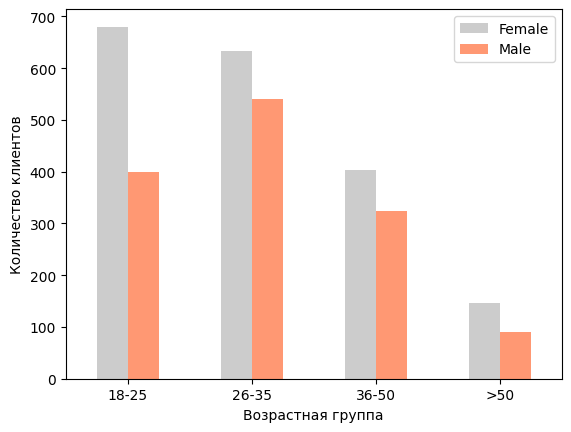

In [ ]:
age_gender.plot(kind='bar',
                x='CustomerAgeGroup',
                xlabel='Возрастная группа',
                ylabel='Количество клиентов',
                color=['silver', 'coral'],
                alpha=0.8,
                rot=0
                );

Чаще совершали покупки с помощью кредитной карты:

In [ ]:
top_clients_table['PaymentMethod'].value_counts()

,count
PaymentMethod,
Credit Card,1093
Bank Transfer,1065
E-Wallet,1062


Наибольшее количество клиентов из города Медан. При этом Джакарта (столица Индонезии) на последнем месте.  
А наибольший доход принесли клиенты из города Бандунг.

In [ ]:
top_clients_table.groupby(['Region']).agg(
    number_of_client = ('CustomerID','count'),
    sales = ('TransactionValue','sum')
)

,number_of_client,sales
Region,,
Bandung,606,1547671352
Denpasar,520,1358800018
Jakarta,381,1009727120
Medan,654,1671926846
Surabaya,490,1281243794
Yogyakarta,569,1414325656


В рассматриваемой группе клиентов больше женщин, поэтому логично, что у них и больше заказов.  
Топ-3 категории у женщин: Спорт, Электроника и Товары для дома.  
Топ-3 категории у мужчин: Товары для дома, Мода и Спорт.

In [ ]:
top_clients_table[['CustomerGender', 'ProductCategory']].value_counts()

CustomerGender  ProductCategory
Female          Sport              382
                Electronics        379
                Home               372
                Fashion            369
                Beauty             362
Male            Home               281
                Fashion            279
                Sport              270
                Beauty             264
                Electronics        262
Name: count, dtype: int64

Если добавить срез возраста, то видим:
* в возрасте 18-25 лет у женщин больше покупок в категориях Спорт и Электроника. У мужчин - Электроника и Мода.
* в возрасте 26-35 лет женщины делали покупки чаще в категории Электроника и Товары для дома. Мужчины - Спорт и Товары для дома.
* у возрастной группы 36-50 лет значительно снизилось число заказов. Видим, что у женщин оно не сильно отличается между категориями. Среди мужчин меньше покупок в категории Спорт.
* в категории более 50 лет: для женщин наименьший интерес представляют товары из категории Электроника, мужчины проявляют меньший интерес к категории Мода и Электроника.

In [ ]:
pd.pivot_table(
    data=top_clients_table,
    index='ProductCategory',
    columns=['CustomerAgeGroup', 'CustomerGender'],
    values='CustomerID',
    aggfunc='count'
)

CustomerAgeGroup  18-25       26-35       36-50         >50     
CustomerGender   Female Male Female Male Female Male Female Male
ProductCategory                                                 
Beauty              126   80    123  102     82   66     31   16
Electronics         144   90    135  100     79   59     21   13
Fashion             134   84    121  110     83   73     31   12
Home                128   71    133  114     80   70     31   26
Sport               148   75    122  115     80   56     32   24

###RFM-анализ на SQL

In [ ]:
from duckdb import query

In [ ]:
#подготовка таблицы для анализа
df_sql = query( '''

SELECT
  TransactionID,
  CustomerID,
  CAST(TransactionDate AS DATE) AS TransactionDate ,
  TransactionValue
FROM data
WHERE TransactionDate LIKE '2024%'


''').to_df()
df_sql.head()

,TransactionID,CustomerID,TransactionDate,TransactionValue
0,TRANS000001,CUST01836,2024-08-05,2713789
1,TRANS000002,CUST01291,2024-04-07,4539248
2,TRANS000003,CUST00245,2024-06-12,3058426
3,TRANS000005,CUST00331,2024-11-24,1556151
4,TRANS000008,CUST00112,2024-09-03,1184496


In [ ]:
rfm_sql = query('''
--рассчитал основные параметры:
WITH rfm_base AS (
SELECT
  CustomerID,
  EXTRACT(
    DAY FROM DATE_ADD(
      (SELECT MAX(TransactionDate) FROM df_sql),
      INTERVAL 1 DAY
    ) - MAX(TransactionDate)
  ) AS recency,
  COUNT(DISTINCT TransactionID) AS frequency,
  SUM(TransactionValue) AS monetary
FROM df_sql
GROUP BY CustomerID
),

--выбрал границы интервалов
percentiles AS (
SELECT
  PERCENTILE_DISC(ARRAY[0.33, 0.67]) WITHIN GROUP (ORDER BY recency) AS recency_pct,
  PERCENTILE_DISC(ARRAY[0.3, 0.8]) WITHIN GROUP (ORDER BY frequency) AS frequency_pct,
  PERCENTILE_DISC(ARRAY[0.33, 0.67]) WITHIN GROUP (ORDER BY monetary) AS monetary_pct
FROM rfm_base
)

SELECT
  *,
  CASE
    WHEN recency <= recency_pct[1] THEN 1
    WHEN recency <= recency_pct[2] THEN 2
    ELSE 3
  END AS r_score,
  CASE
    WHEN frequency <= frequency_pct[1] THEN 3
    WHEN frequency <= frequency_pct[2] THEN 2
    ELSE 1
  END AS f_score,
  CASE
    WHEN monetary <= monetary_pct[1] THEN 3
    WHEN monetary <= monetary_pct[2] THEN 2
    ELSE 1
  END AS m_score
FROM rfm_base, percentiles


''').to_df()
rfm_sql

,CustomerID,recency,frequency,monetary,recency_pct,frequency_pct,monetary_pct,r_score,f_score,m_score
0,CUST00112,23,13,28959665.00,"[12, 33]","[10, 15]","[26280354.0, 35845120.0]",2,2,2
1,CUST01726,39,15,39037334.00,"[12, 33]","[10, 15]","[26280354.0, 35845120.0]",3,2,1
2,CUST01461,10,15,44717559.00,"[12, 33]","[10, 15]","[26280354.0, 35845120.0]",1,2,1
3,CUST01579,16,12,31918995.00,"[12, 33]","[10, 15]","[26280354.0, 35845120.0]",2,2,2
4,CUST01957,18,7,19707919.00,"[12, 33]","[10, 15]","[26280354.0, 35845120.0]",2,3,3
...,...,...,...,...,...,...,...,...,...,...
1995,CUST01315,74,10,35604619.00,"[12, 33]","[10, 15]","[26280354.0, 35845120.0]",3,3,2
1996,CUST00792,26,6,15909060.00,"[12, 33]","[10, 15]","[26280354.0, 35845120.0]",2,3,3
1997,CUST01639,10,10,20552483.00,"[12, 33]","[10, 15]","[26280354.0, 35845120.0]",1,3,3
1998,CUST01177,33,6,18517672.00,"[12, 33]","[10, 15]","[26280354.0, 35845120.0]",2,3,3


In [ ]:
result = query('''

SELECT
  CustomerID,
  r_score,
  f_score,
  m_score,
  CONCAT(r_score, f_score, m_score) AS rfm,
  CASE
    WHEN r_score = 1 AND f_score IN [1, 2] AND m_score IN [1, 2, 3] THEN 'Постоянные клиенты'
    WHEN r_score = 1 AND f_score = 3 AND m_score IN [1, 2, 3] THEN 'Новички'
    WHEN r_score = 2 AND f_score IN [1, 2, 3] AND m_score IN [1, 2, 3] THEN 'Неактивные клиенты'
    ELSE 'Уходящие клиенты'
  END AS rfm_group
FROM rfm_sql

''').to_df()
result

,CustomerID,r_score,f_score,m_score,rfm,rfm_group
0,CUST00112,2,2,2,222,Неактивные клиенты
1,CUST01726,3,2,1,321,Уходящие клиенты
2,CUST01461,1,2,1,121,Постоянные клиенты
3,CUST01579,2,2,2,222,Неактивные клиенты
4,CUST01957,2,3,3,233,Неактивные клиенты
...,...,...,...,...,...,...
1995,CUST01315,3,3,2,332,Уходящие клиенты
1996,CUST00792,2,3,3,233,Неактивные клиенты
1997,CUST01639,1,3,3,133,Новички
1998,CUST01177,2,3,3,233,Неактивные клиенты
